In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
data = pd.read_csv('file.csv')

In [16]:
fdata=data.drop([64463, 68782])

In [17]:
df = fdata

In [18]:
X=df.drop(['Unnamed: 0','price'], axis=1)
y=df['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [20]:
regressor = lgb.LGBMRegressor()
regressor.fit(X_train, y_train)
regressor_pred = regressor.predict(X_test)

In [21]:
score = r2_score(y_test, regressor_pred)
print(score)

0.9477004607919719


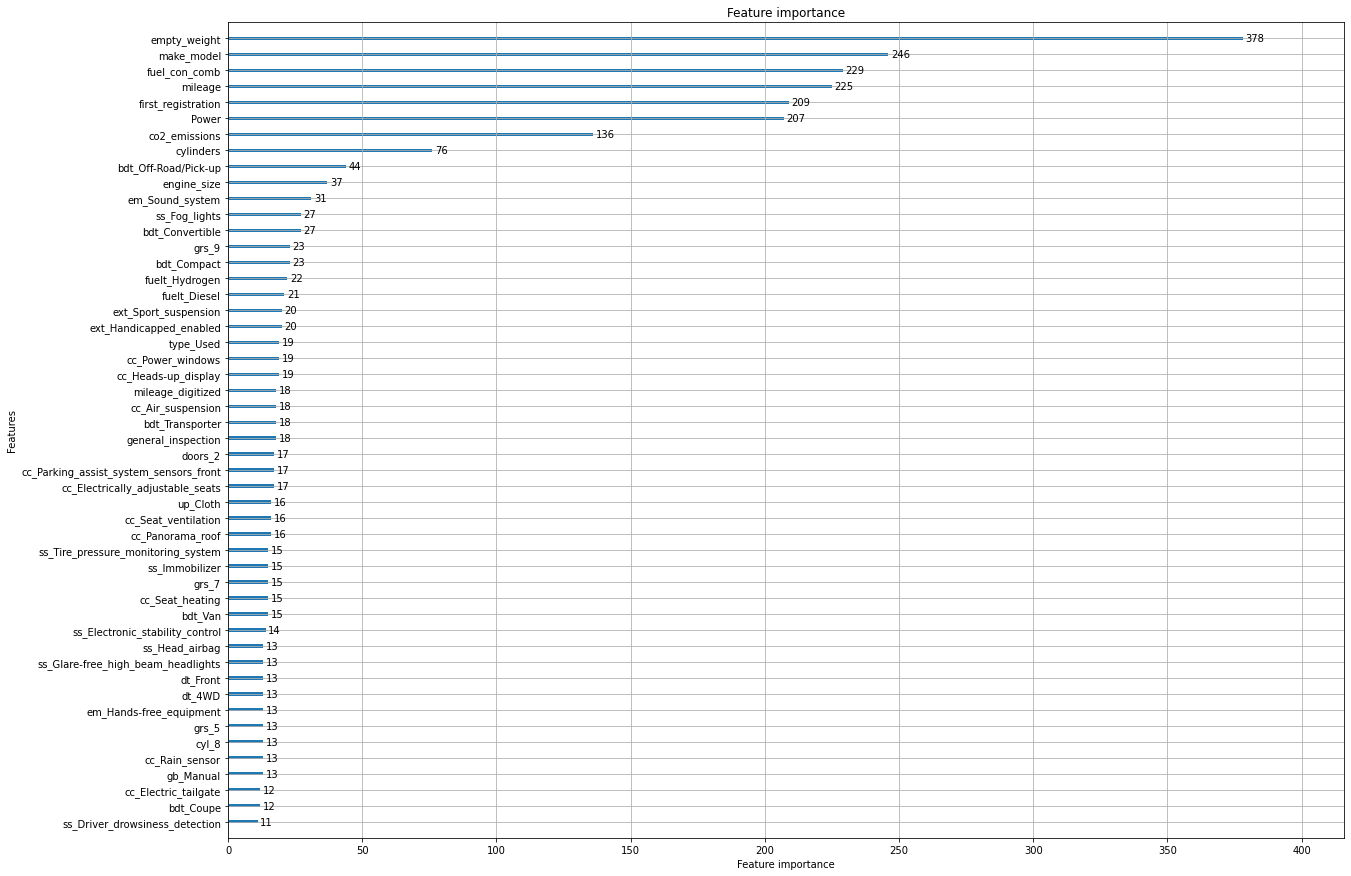

In [22]:
lgb.plot_importance(regressor,figsize=(20,15),  max_num_features=50)
plt.show()

In [23]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(regressor, filename)

['finalized_model.sav']

In [24]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9477004607919719
